<a href="https://colab.research.google.com/github/venkat123reddy/DeepLearning/blob/main/assignment_2_task_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Original Dataset (first 5 rows):
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2

Min-Max Normalized Dataset (first 5 rows):
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0           0.222222          0.625000           0.067797          0.041667
1           0.166667          0.416667           0.067797          0.041667
2           0.111111          0.500000           0.050847          0.041667
3           0.083333          0.458333           0.084746          0.041667
4           0.194444          0.666667           0.067797          0.041667

Z-score St

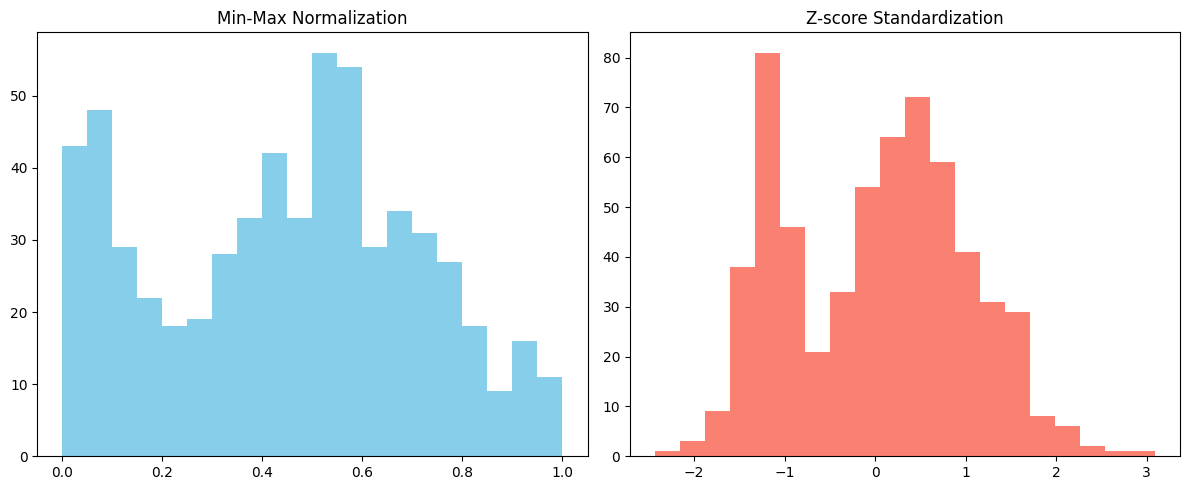


Accuracy without scaling: 1.0000
Accuracy with Min-Max Normalization: 0.9111
Accuracy with Z-score Standardization: 1.0000


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Step 1: Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Convert to DataFrame for better visualization
df = pd.DataFrame(X, columns=iris.feature_names)

print("Original Dataset (first 5 rows):")
print(df.head())

# Step 2: Min-Max Normalization
min_max_scaler = MinMaxScaler()
X_norm = min_max_scaler.fit_transform(X)
df_norm = pd.DataFrame(X_norm, columns=iris.feature_names)
print("\nMin-Max Normalized Dataset (first 5 rows):")
print(df_norm.head())

# Step 3: Z-score Standardization
std_scaler = StandardScaler()
X_std = std_scaler.fit_transform(X)
df_std = pd.DataFrame(X_std, columns=iris.feature_names)
print("\nZ-score Standardized Dataset (first 5 rows):")
print(df_std.head())

# Visualization: Histograms
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.hist(X_norm.flatten(), bins=20, color='skyblue')
plt.title('Min-Max Normalization')

plt.subplot(1, 2, 2)
plt.hist(X_std.flatten(), bins=20, color='salmon')
plt.title('Z-score Standardization')
plt.tight_layout()
plt.show()

# Step 4: Train Logistic Regression Model

# Split original dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)
orig_acc = accuracy_score(y_test, model.predict(X_test))

# On Normalized Data
Xn_train, Xn_test, yn_train, yn_test = train_test_split(X_norm, y, test_size=0.3, random_state=42)
model.fit(Xn_train, yn_train)
norm_acc = accuracy_score(yn_test, model.predict(Xn_test))

# On Standardized Data
Xs_train, Xs_test, ys_train, ys_test = train_test_split(X_std, y, test_size=0.3, random_state=42)
model.fit(Xs_train, ys_train)
std_acc = accuracy_score(ys_test, model.predict(Xs_test))

print(f"\nAccuracy without scaling: {orig_acc:.4f}")
print(f"Accuracy with Min-Max Normalization: {norm_acc:.4f}")
print(f"Accuracy with Z-score Standardization: {std_acc:.4f}")


In [4]:
print('''Technique	Use When...
Normalization
(Min-Max Scaling)	- we know the data has fixed bounds (e.g., pixel values 0-255)
- we want features between [0, 1] or [-1, 1]
Standardization
(Z-score Scaling)	- Data follows a Gaussian (normal) distribution
- Model assumes centered data (e.g., Logistic Regression, SVM, PCA)
- Deep Learning models prefer zero-mean inputs for faster convergence''')

Technique	Use When...
Normalization
(Min-Max Scaling)	- we know the data has fixed bounds (e.g., pixel values 0-255)
- we want features between [0, 1] or [-1, 1]
Standardization
(Z-score Scaling)	- Data follows a Gaussian (normal) distribution
- Model assumes centered data (e.g., Logistic Regression, SVM, PCA)
- Deep Learning models prefer zero-mean inputs for faster convergence
